# Setup

In [1]:
# import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# set path
path=r'C:\Users\t3mar\Career Foundry\Data Analytics\Project 4 Instacart'

In [3]:
# import data
cst_ord_prd = pd.read_pickle(os.path.join(path,'02 Data', 'Prepared Data', 'CstOrdPrd2.pkl'))

# Regions

In [4]:
# create region 1
R1 = ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']

In [5]:
# create region 2
R2 = ['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnseota', 'Iowa', 'Missouri']

In [6]:
# create region 3
R3 = ['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']

In [7]:
# create region 4
R4 = ['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii']

In [8]:
# apply regions
result = []

for value in cst_ord_prd["State"]:
  if value in R1:
    result.append("1")
  elif value in R2:
    result.append("2")
  elif value in R3:
    result.append("3")
  else:
    result.append("4")

In [9]:
# insert column
cst_ord_prd['Region'] = result

# Region Spending Habits

In [10]:
# create chart
crosstab1 = pd.crosstab(cst_ord_prd['Region'], cst_ord_prd['loyalty_flag'], dropna = False)

In [11]:
# print chart
crosstab1

loyalty_flag,loyal customer,new customer,regular customer
Region,,,
1,1841785,1100207,2780744
2,2168325,1357275,3423900
3,3405844,2074410,5311631
4,2868139,1712098,4360501


In [12]:
# create bar graph data
region_loyalty = cst_ord_prd.groupby(['Region', 'loyalty_flag']).size().unstack(fill_value=0)

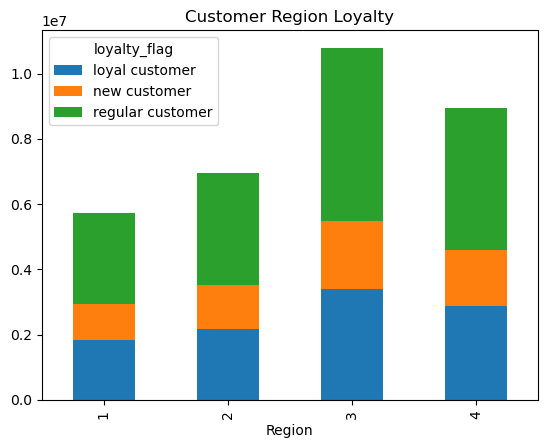

In [13]:
# print bar graph
bar_region_loyalty = region_loyalty.plot.bar(stacked=True, title='Customer Region Loyalty')

In [14]:
bar_region_loyalty.figure.savefig(os.path.join(path, '04 Analysis', 'Visuals', 'bar_region_loyalty.png'))

# CFO Interest

In [15]:
# apply filter
cst_ord_prd.loc[cst_ord_prd['max_order'] >= 5, 'cfo_interest'] = 'True'
cst_ord_prd.loc[cst_ord_prd['max_order'] < 4, 'cfo_interest'] = 'False'

In [16]:
# create flag
cfo_data = cst_ord_prd[cst_ord_prd['cfo_interest'] == 'True']

In [17]:
#results
cfo_data

,Unnamed: 0_x,order_id,user_id,order_number,weekday,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,...,State,Age,date_joined,Dependants,Relationship,income,max_order,loyalty_flag,Region,cfo_interest
0,0,2539329,1,1,2,8,NaN,196,1,0,...,Alabama,31,2/17/2019,3,married,40423,10,new customer,3,True
1,1,2398795,1,2,3,7,15.0,196,1,1,...,Alabama,31,2/17/2019,3,married,40423,10,new customer,3,True
2,2,473747,1,3,3,12,21.0,196,1,1,...,Alabama,31,2/17/2019,3,married,40423,10,new customer,3,True
3,3,2254736,1,4,4,7,29.0,196,1,1,...,Alabama,31,2/17/2019,3,married,40423,10,new customer,3,True
4,4,431534,1,5,4,15,28.0,196,1,1,...,Alabama,31,2/17/2019,3,married,40423,10,new customer,3,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32404850,1768141,3308056,106143,22,4,20,10.0,19675,1,1,...,Hawaii,25,5/26/2017,0,single,53755,26,regular customer,4,True
32404851,1768142,2988973,106143,23,2,22,5.0,19675,1,1,...,Hawaii,25,5/26/2017,0,single,53755,26,regular customer,4,True
32404852,1768143,930,106143,24,6,12,4.0,19675,1,1,...,Hawaii,25,5/26/2017,0,single,53755,26,regular customer,4,True
32404853,1768144,467253,106143,25,6,16,7.0,19675,1,1,...,Hawaii,25,5/26/2017,0,single,53755,26,regular customer,4,True


In [18]:
# verify values
cst_ord_prd['cfo_interest'].value_counts()

True     30964564
False      686752
Name: cfo_interest, dtype: int64

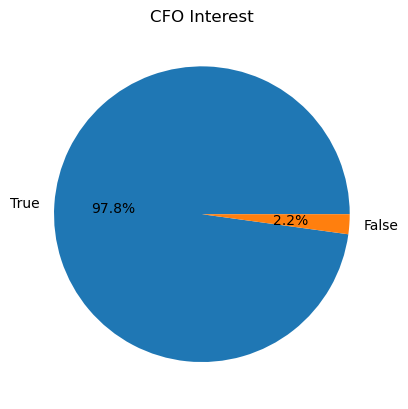

In [19]:
# chart results
cfo_int = 'True', 'False'
sizes = [30964564, 686752]

plt.pie(sizes, labels = cfo_int, autopct='%1.1f%%')
plt.title('CFO Interest')
plt.savefig(os.path.join(path, '04 Analysis', 'Visuals', 'pie_cfo_interest.png'))
plt.show()

# Profiles

In [20]:
# set profile requirements
conditions = [
    (cst_ord_prd['Age'] <= 35) & (cst_ord_prd['income'] < 65000) & (cst_ord_prd['Dependants'] == 0),
    (cst_ord_prd['Age'] <= 35) & (cst_ord_prd['income'] < 65000) & (cst_ord_prd['Dependants'] > 0),
    (cst_ord_prd['Age'] <= 35) & (cst_ord_prd['income'] >= 65000) & (cst_ord_prd['Dependants'] == 0),
    (cst_ord_prd['Age'] <= 35) & (cst_ord_prd['income'] >= 65000) & (cst_ord_prd['Dependants'] > 0),
    (cst_ord_prd['Age'] > 35) & (cst_ord_prd['Age'] <= 63) & (cst_ord_prd['income'] < 100000) & (cst_ord_prd['Dependants'] == 0),
    (cst_ord_prd['Age'] > 35) & (cst_ord_prd['Age'] <= 63) & (cst_ord_prd['income'] < 100000) & (cst_ord_prd['Dependants'] > 0),
    (cst_ord_prd['Age'] > 35) & (cst_ord_prd['Age'] <= 63) & (cst_ord_prd['income'] >= 100000) & (cst_ord_prd['Dependants'] == 0),
    (cst_ord_prd['Age'] > 35) & (cst_ord_prd['Age'] <= 63) & (cst_ord_prd['income'] >= 100000) & (cst_ord_prd['Dependants'] > 0),
    (cst_ord_prd['Age'] >= 63) & (cst_ord_prd['income'] < 100000) & (cst_ord_prd['Dependants'] == 0), 
    (cst_ord_prd['Age'] >= 63) & (cst_ord_prd['income'] < 100000) & (cst_ord_prd['Dependants'] > 0),
    (cst_ord_prd['Age'] >= 63) & (cst_ord_prd['income'] >= 100000) & (cst_ord_prd['Dependants'] == 0),
    (cst_ord_prd['Age'] >= 63) & (cst_ord_prd['income'] >= 100000) & (cst_ord_prd['Dependants'] > 0)
]

In [21]:
# name profiles
results = ['yng lo_inc no_dep', 'yng lo_inc dep', 'yng hi_inc no_dep', 'yng hi_inc dep', 'mid_age lo_inc no_dep', 'mid_age lo_inc dep', 'mid_age hi_inc no_dep', 'mid_age hi_inc dep', 'old lo_inc no_dep', 'old lo_inc dep', 'old hi_inc no_dep', 'old hi_inc dep']

In [22]:
# insert column
cst_ord_prd['profile'] = np.select(conditions, results)

In [23]:
# check for nulls
cst_ord_prd['profile'].value_counts()

mid_age hi_inc dep       6101436
old hi_inc dep           4776360
mid_age lo_inc dep       4493211
yng hi_inc dep           3971781
yng lo_inc dep           2898416
old lo_inc dep           2066152
mid_age hi_inc no_dep    2063576
old hi_inc no_dep        1580863
mid_age lo_inc no_dep    1497124
yng hi_inc no_dep        1310353
yng lo_inc no_dep         965869
old lo_inc no_dep         679718
Name: profile, dtype: int64

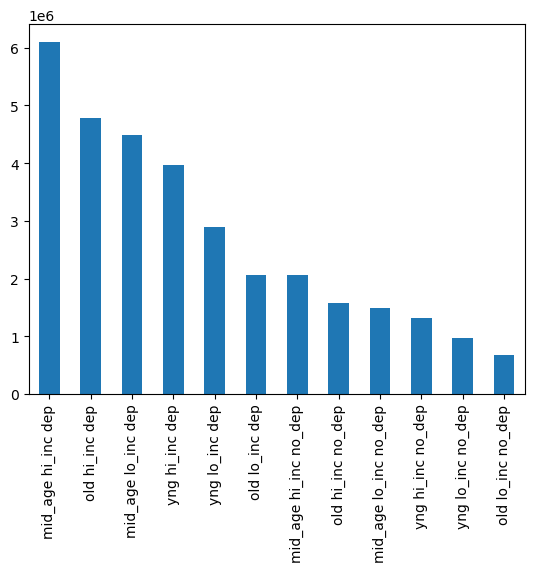

In [24]:
# profile distribution bar graph
bar = cst_ord_prd['profile'].value_counts().plot.bar()

In [25]:
bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visuals', 'bar_profile_distribution.png'))

### Profile vs Loyalty

In [26]:
# group data
profile_loyalty = cst_ord_prd.groupby(['profile', 'loyalty_flag']).size().unstack(fill_value=0)

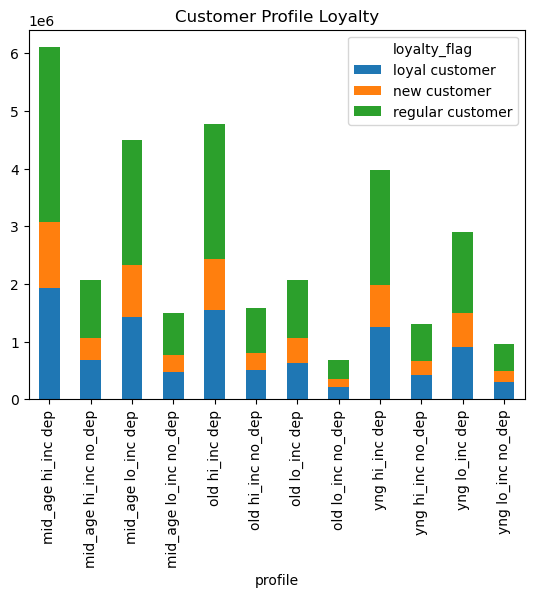

In [27]:
# plot data
bar_profile_loyalty = profile_loyalty.plot.bar(stacked=True, title='Customer Profile Loyalty')

In [28]:
bar_profile_loyalty.figure.savefig(os.path.join(path, '04 Analysis', 'Visuals', 'bar_profile_loyalty.png'))

In [29]:
# create table
crosstab2 = pd.crosstab(cst_ord_prd['loyalty_flag'], cst_ord_prd['profile'], dropna = False)

In [30]:
# print table
crosstab2

profile,mid_age hi_inc dep,mid_age hi_inc no_dep,mid_age lo_inc dep,mid_age lo_inc no_dep,old hi_inc dep,old hi_inc no_dep,old lo_inc dep,old lo_inc no_dep,yng hi_inc dep,yng hi_inc no_dep,yng lo_inc dep,yng lo_inc no_dep
loyalty_flag,,,,,,,,,,,,
loyal customer,1927896,685343,1422461,476305,1544631,505014,637985,210909,1256777,416575,905499,294698
new customer,1139960,375559,910506,296107,890629,295568,427993,143055,732727,244830,583088,203968
regular customer,3033580,1002674,2160244,724712,2341100,780281,1000174,325754,1982277,648948,1409829,467203


### Profile Aggregations

In [31]:
# prices
cst_ord_prd.groupby('profile').agg({'prices': ['mean', 'min', 'max']})

prices              
                            mean  min      max
profile                                       
mid_age hi_inc dep     14.752651  1.0  99999.0
mid_age hi_inc no_dep  15.385699  1.0  99999.0
mid_age lo_inc dep      8.036846  1.0  99999.0
mid_age lo_inc no_dep   7.917545  1.0  99999.0
old hi_inc dep         13.510390  1.0  99999.0
old hi_inc no_dep      13.538878  1.0  99999.0
old lo_inc dep          7.865180  1.0  99999.0
old lo_inc no_dep       7.951167  1.0  99999.0
yng hi_inc dep         15.400299  1.0  99999.0
yng hi_inc no_dep      15.650728  1.0  99999.0
yng lo_inc dep          7.566058  1.0  14900.0
yng lo_inc no_dep       7.555715  1.0     25.0

In [32]:
# max order
cst_ord_prd.groupby('profile').agg({'max_order': ['mean', 'min', 'max']})

max_order        
                            mean min max
profile                                 
mid_age hi_inc dep     33.059964   1  99
mid_age hi_inc no_dep  34.155474   2  99
mid_age lo_inc dep     32.767295   3  99
mid_age lo_inc no_dep  32.847848   3  99
old hi_inc dep         33.168826   3  99
old hi_inc no_dep      33.531531   3  99
old lo_inc dep         32.566051   2  99
old lo_inc no_dep      32.444581   3  99
yng hi_inc dep         33.276641   3  99
yng hi_inc no_dep      33.103010   3  99
yng lo_inc dep         32.634049   3  99
yng lo_inc no_dep      32.656272   3  99

### Profile vs Department

In [33]:
# label departments
cst_ord_prd.loc[cst_ord_prd['department_id'] == 1, 'Department'] = 'frozen'
cst_ord_prd.loc[cst_ord_prd['department_id'] == 2, 'Department'] = 'other'
cst_ord_prd.loc[cst_ord_prd['department_id'] == 3, 'Department'] = 'bakery'
cst_ord_prd.loc[cst_ord_prd['department_id'] == 4, 'Department'] = 'produce'
cst_ord_prd.loc[cst_ord_prd['department_id'] == 5, 'Department'] = 'alcohol'
cst_ord_prd.loc[cst_ord_prd['department_id'] == 6, 'Department'] = 'international'
cst_ord_prd.loc[cst_ord_prd['department_id'] == 7, 'Department'] = 'beverages'
cst_ord_prd.loc[cst_ord_prd['department_id'] == 8, 'Department'] = 'pets'
cst_ord_prd.loc[cst_ord_prd['department_id'] == 9, 'Department'] = 'dry goods'
cst_ord_prd.loc[cst_ord_prd['department_id'] == 10, 'Department'] = 'bulk'
cst_ord_prd.loc[cst_ord_prd['department_id'] == 11, 'Department'] = 'personal care'
cst_ord_prd.loc[cst_ord_prd['department_id'] == 12, 'Department'] = 'meat/seafood'
cst_ord_prd.loc[cst_ord_prd['department_id'] == 13, 'Department'] = 'pantry'
cst_ord_prd.loc[cst_ord_prd['department_id'] == 14, 'Department'] = 'breakfast'
cst_ord_prd.loc[cst_ord_prd['department_id'] == 15, 'Department'] = 'canned goods'
cst_ord_prd.loc[cst_ord_prd['department_id'] == 16, 'Department'] = 'dairy'
cst_ord_prd.loc[cst_ord_prd['department_id'] == 17, 'Department'] = 'household'
cst_ord_prd.loc[cst_ord_prd['department_id'] == 18, 'Department'] = 'babies'
cst_ord_prd.loc[cst_ord_prd['department_id'] == 19, 'Department'] = 'snacks'
cst_ord_prd.loc[cst_ord_prd['department_id'] == 20, 'Department'] = 'deli'
cst_ord_prd.loc[cst_ord_prd['department_id'] == 21, 'Department'] = 'missing'

In [34]:
# create chart
crosstab3 = pd.crosstab(cst_ord_prd['Department'], cst_ord_prd['profile'], dropna = False)

In [35]:
# print chart
crosstab3

profile,mid_age hi_inc dep,mid_age hi_inc no_dep,mid_age lo_inc dep,mid_age lo_inc no_dep,old hi_inc dep,old hi_inc no_dep,old lo_inc dep,old lo_inc no_dep,yng hi_inc dep,yng hi_inc no_dep,yng lo_inc dep,yng lo_inc no_dep
Department,,,,,,,,,,,,
alcohol,29414,10682,20376,7048,21392,7514,9327,3016,20290,6251,13779,4607
babies,85982,28637,56692,18775,64143,20268,23360,8540,53940,18827,33191,11447
bakery,225010,78208,156935,51380,176379,57700,71362,23572,145932,48761,102405,34784
beverages,481049,164558,400531,131960,378497,124937,192743,63609,305571,103306,255290,86072
breakfast,127817,44490,101653,33196,99292,32329,48363,15282,84551,27271,66780,22009
bulk,5984,2025,5338,1573,4920,1557,2522,727,4334,1285,3197,1111
canned goods,210994,70486,137602,46370,164985,52866,61485,20092,136914,45003,91240,30021
dairy,1028748,348619,728506,244289,809009,265001,328732,111831,681152,223299,473238,156323
deli,197698,67319,144136,49415,156039,52187,65566,21702,128999,43130,93666,31392


In [36]:
# group data
profile_department = cst_ord_prd.groupby(['profile', 'Department']).size().unstack(fill_value=0)

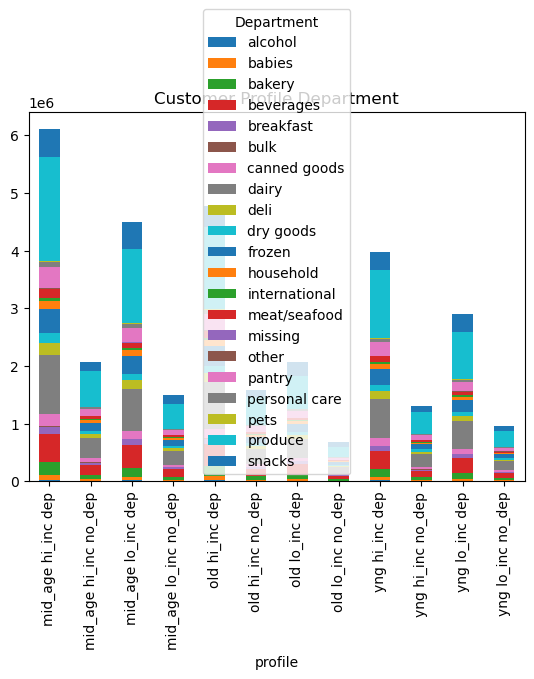

In [37]:
# plot data
bar_profile_department = profile_department.plot.bar(stacked=True, title='Customer Profile Department')

In [38]:
bar_profile_department.figure.savefig(os.path.join(path, '04 Analysis', 'Visuals', 'bar_profile_department.png'))

### Profile vs Region

In [39]:
#create chart
crosstab4 = pd.crosstab(cst_ord_prd['Region'], cst_ord_prd['profile'], dropna = False)

In [40]:
# print chart
crosstab4

profile,mid_age hi_inc dep,mid_age hi_inc no_dep,mid_age lo_inc dep,mid_age lo_inc no_dep,old hi_inc dep,old hi_inc no_dep,old lo_inc dep,old lo_inc no_dep,yng hi_inc dep,yng hi_inc no_dep,yng lo_inc dep,yng lo_inc no_dep
Region,,,,,,,,,,,,
1,1099254,340051,771706,247071,855566,291836,370316,123633,712634,240848,494959,174862
2,1341814,458778,940283,331444,1029105,330946,419917,153785,843911,281758,629450,188309
3,1982228,686950,1532238,498209,1573405,516946,692088,222760,1333620,447390,976647,329404
4,1678140,577797,1248984,420400,1318284,441135,583831,179540,1081616,340357,797360,273294


In [41]:
# group data
profile_region = cst_ord_prd.groupby(['profile', 'Region']).size().unstack(fill_value=0)

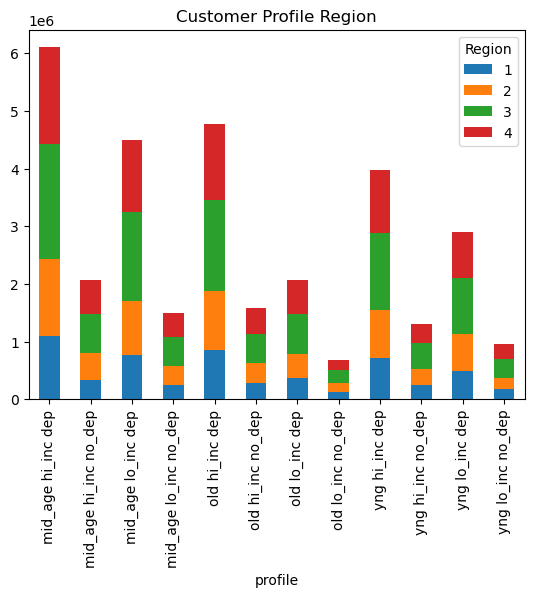

In [42]:
# plot data
bar_profile_region = profile_region.plot.bar(stacked=True, title='Customer Profile Region')

In [43]:
bar_profile_region.figure.savefig(os.path.join(path, '04 Analysis', 'Visuals', 'bar_profile_region.png'))